In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics as stat
import pandas as pd
import sys
import os

### FOR CONNECTIVITY ON COMPLETELT CONNECTED GRAPH 
datadir1  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/TechnicalProject/Fig_Assembly/Data/dumplin_bonds/'

plotsdir = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/TechnicalProject/Fig_Assembly/Plots/'

sys.setrecursionlimit(10000) 
clrs = ['#fde0dd','#fa9fb5','#ae017e']
clrs2 = ["#a1dab4",'#225ea8']
clrs3 = ['#fdbe85','#d94701']
clrs4 = ['#a1dab4','#41b6c4','#225ea8']

In [2]:
def dfs(graph, start, visited):
    visited.add(start)
    count = 1  # Count the starting node
    for neighbor in graph[start]:
        if neighbor not in visited:
            count += dfs(graph, neighbor, visited)  # Add count from neighbors
    return count

def build_graph(edges):
    graph = {}
    for edge in edges:
        a, b = edge
        if a not in graph:
            graph[a] = []
        if b not in graph:
            graph[b] = []
        graph[a].append(b)
        graph[b].append(a)  # Omit this line for a directed graph
    return graph

def largest_connected_component(graph):
    visited = set()
    largest = 0
    for node in graph:
        if node not in visited:
            size = dfs(graph, node, visited)
            largest = max(largest, size)
    return largest

def is_connected(graph, nodes):
    visited = set()
    dfs(graph, next(iter(graph)), visited)
    return len(visited) == len(nodes)

def find_connected_components(graph, nodes):
    visited = set()
    num_components = 0
    for node in nodes:
        if node not in visited:
            dfs(graph, node, visited)
            num_components += 1
    return num_components
    
def calculate_average_degree(graph):
    total_degrees = sum(len(neighbors) for neighbors in graph.values())
    num_nodes = len(graph)
    #print(num_nodes)
    average_degree = total_degrees / num_nodes if num_nodes else 0
    return average_degree

In [4]:
connectedsubgraphsNR = []
timeNR = []
LargestCompNR = []
AvDegreeNR = []
i=0
datadir = datadir1
files = [f for f in os.listdir(datadir) if os.path.isfile(os.path.join(datadir, f))]
numnodes = 6250
# Sort the list of files
files.sort()
count = 0
for file_name in files:
    file_path = os.path.join(datadir, file_name)
    bonds_ = pd.read_csv(file_path, header = None,skiprows =9, usecols = [1,2], sep=' ')
    bonds = bonds_.values
    edges = bonds  # list of edges
    graph = build_graph(edges)
    nodes = np.arange(1,numnodes+1,1)  # list of nodes
    timeNR.append(i*2)
    i+=1
    connectedsubgraphsNR.append(find_connected_components(graph, nodes))
    LargestCompNR.append(largest_connected_component(graph))
    AvDegreeNR.append((calculate_average_degree(graph)))

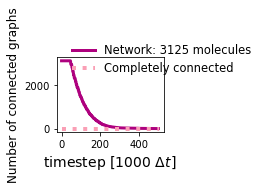

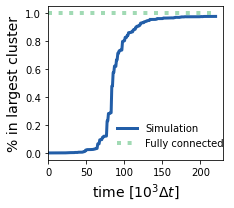

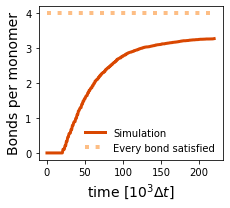

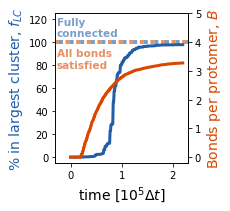

In [5]:
fig,ax = plt.subplots(figsize = (3,2))
ax.plot(timeNR,connectedsubgraphsNR,linewidth = 3,color = clrs[2],label = "Network: " +str(int(numnodes/2))+" molecules")
ax.plot([0,i*2],[1,1],linestyle = ':',color = clrs[1],linewidth = 4,label = 'Completely connected')
ax.set_ylabel("Number of connected graphs",fontsize = 12)
ax.set_xlabel(r"timestep [$1000~\Delta t$]",fontsize = 14)
ax.legend(frameon=False,loc = [0.1,0.7],fontsize = 11.5)
fig.tight_layout()
#ax.set_yscale('log')
#plotname = "assembly_3125_Lat_simtime1e6_NumConnected.pdf"
#fig.savefig(plotsdir+plotname)


fig2,ax2 = plt.subplots(figsize=(3.3, 3.))
ax2.plot(np.divide(np.multiply(timeNR,440),1000),np.divide(LargestCompNR,numnodes),linewidth = 3,color = clrs2[1],label =  "Simulation")
ax2.plot([0,i*2*0.44],[1,1],color = clrs2[0],linestyle = ':',linewidth = 4,label = 'Fully connected')
ax2.set_ylabel("% in largest cluster",fontsize = 14)
ax2.set_xlabel(r"time $[10^3 \Delta t]$",fontsize = 14)
ax2.legend(frameon=False,loc = [0.37,0.05])
ax2.set_xlim([0,230])
fig2.tight_layout()
plotname2 = "assembly_3125_ChemBond6.0_LargestComp.pdf"
#fig2.savefig(plotsdir+plotname2)

fig3,ax3 = plt.subplots(figsize=(3.3, 3.))
ax3.plot(np.divide(np.multiply(timeNR,440),1000),np.multiply(np.add(AvDegreeNR,-1),2),color = clrs3[1],linewidth = 3,label = "Simulation")
ax3.plot([0,i*2*0.44],[4,4],color = clrs3[0],linestyle = ':',linewidth = 4,label = 'Every bond satisfied')
ax3.set_ylabel("Bonds per monomer",fontsize = 14)
ax3.legend(frameon=False,loc = [0.23,0.02])
ax3.set_xlabel(r"time $[10^3 \Delta t]$",fontsize = 14)

fig3.tight_layout()


plotname3 = "assembly_3125_ChemBond6.0_AvDegree.pdf"
#fig3.savefig(plotsdir+plotname3)


fig4, ax4 = plt.subplots(figsize=(3.3, 3.))
shift = 7
# Plotting the first data on the first axis
line1 = ax4.plot(np.divide(np.multiply(timeNR, 440), 100000), np.divide(LargestCompNR, 0.01*numnodes), linewidth=3, color=clrs2[1])
line2 = ax4.plot([-0.3+shift*0.01,2.5+shift*0.01], [100, 100], color=clrs2[1],alpha = 0.6, linestyle=':', linewidth=4, label='Fully connected')
ax4.set_ylabel("% in largest cluster, $f_{LC}$", fontsize=14)
ax4.set_xlabel(r"time $[10^5 \Delta t]$", fontsize=14)
#ax4.legend(frameon=False, loc=[0.37,0.35])
#ax4.set_xlim([0, 230])
text = 'Fully \nconnected'
ax4.text(-0.27,105,text,color=clrs2[1],alpha = 0.6,fontweight = 'bold',fontsize = 10.5)
ax4.set_ylim([-5,125])
#ax4.set_ylim([0,1.1])
# Create the second axis sharing the same x-axis
ax4.set_xlim([-0.3,2.3])
ax5 = ax4.twinx()

# Plotting the second data on the second axis
line3 = ax5.plot(np.divide(np.multiply(timeNR, 440), 100000), np.multiply(np.add(AvDegreeNR, -1), 2), color=clrs3[1], linewidth=3)
line4 = ax5.plot([-0.3, 2.3], [4, 4], color=clrs3[1],alpha = 0.6, linestyle=':', linewidth=4, label='All bond satisfied')
ax5.set_ylabel("Bonds per protomer, $B$", fontsize=14)
text = 'All bonds \nsatisfied'
#ax5.text(-0.27,4.15,text,color=clrs3[1],alpha = 0.7,fontweight = 'bold',fontsize = 10.5)
ax5.text(-0.27,3.1,text,color=clrs3[1],alpha = 0.6,fontweight = 'bold',fontsize = 10.5)
ax5.set_ylim([-5*(4.5/112.5),125*(4.5/112.5)])
#ax5.legend(frameon=False, loc=[0.37,0.25])

# Set colors for the y-axis labels
ax4.yaxis.label.set_color(line1[0].get_color())
ax5.yaxis.label.set_color(line3[0].get_color())

fig4.tight_layout()

plotname1 = "DoubleAxis_Degree_LargestComp.pdf"
#fig4.savefig(plotsdir+plotname1)
